In [2]:
import os
import sys
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
folder_path = "/Users/nikolaygusarov/IntegerFluxonium/IntegerFluxonium/sampleD/20250221_CW/2025-02-28/00160-CW_twotone_vs_index_2025-02-28T175300"
filename = "data.ddh5"

In [9]:
h5file = h5py.File(os.path.join(folder_path, filename), "r")
mag2D = np.array(h5file["data"]["mag_dB"][:])
phase2D = np.array(h5file["data"]["phase"][:])
qu_freq2D = np.array(h5file["data"]["qu_freq"][:])
sweep_param1D = np.array(h5file["data"]["sweep_param"][:])

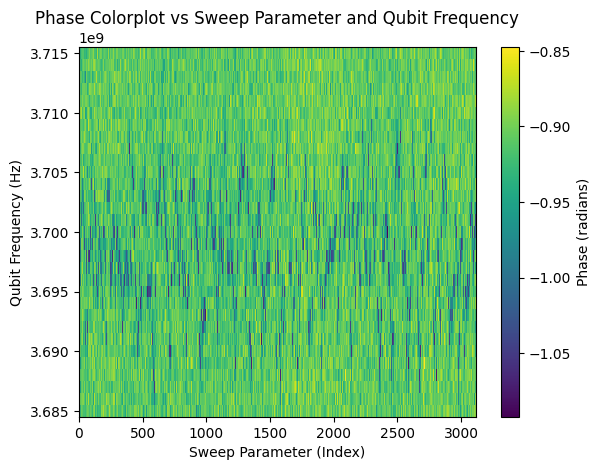

In [11]:
# Plot the colorplot
# plt.figure(figsize=(10, 6))
plt.pcolormesh(sweep_param1D, qu_freq2D.T, phase2D.T, shading='auto', cmap='viridis')
plt.colorbar(label="Phase (radians)")
plt.xlabel("Sweep Parameter (Index)")
plt.ylabel("Qubit Frequency (Hz)")
plt.title("Phase Colorplot vs Sweep Parameter and Qubit Frequency")
plt.show()


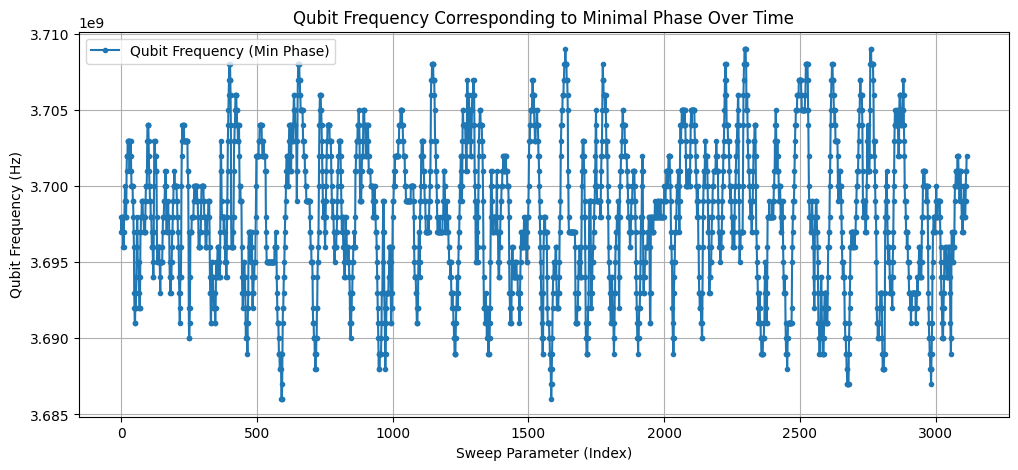

In [14]:
# Extract the qubit frequency corresponding to the minimal phase for each sweep index

# Find the index of the minimum phase value for each sweep step (axis=1)
min_phase_indices = np.argmin(phase2D, axis=1)

# Extract the corresponding qubit frequencies
qu_freq_min_phase = qu_freq2D[np.arange(len(sweep_param1D)), min_phase_indices]

# Plot the extracted qubit frequency curve over time (sweep_param)
plt.figure(figsize=(12, 5))
plt.plot(sweep_param1D, qu_freq_min_phase, marker='o', linestyle='-', markersize=3, label="Qubit Frequency (Min Phase)")
plt.xlabel("Sweep Parameter (Index)")
plt.ylabel("Qubit Frequency (Hz)")
plt.title("Qubit Frequency Corresponding to Minimal Phase Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
time_per_iter_VNA = 1/200 * 31 # s/iter
time_per_iter_TQDM = 1/1.67 # s/iter

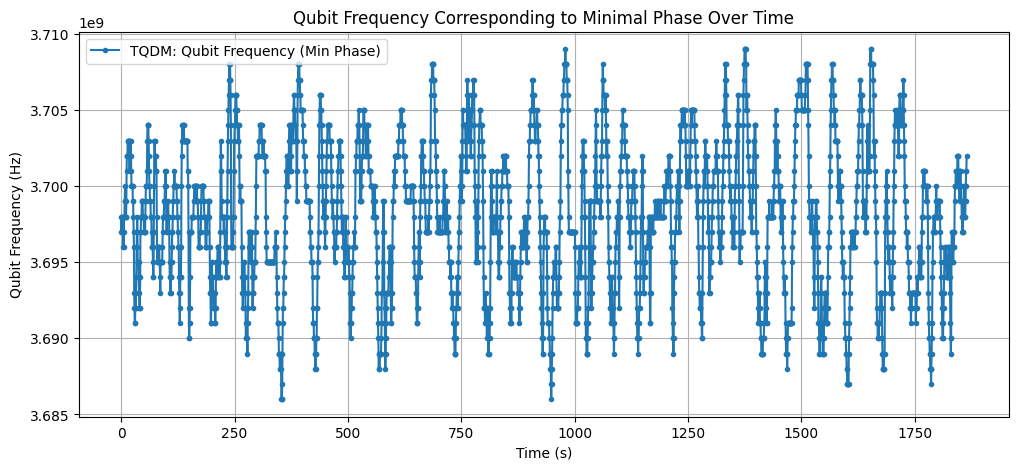

In [27]:
# Extract the qubit frequency corresponding to the minimal phase for each sweep index

# Find the index of the minimum phase value for each sweep step (axis=1)
min_phase_indices = np.argmin(phase2D, axis=1)

# Extract the corresponding qubit frequencies
qu_freq_min_phase = qu_freq2D[np.arange(len(sweep_param1D)), min_phase_indices]

# Plot the extracted qubit frequency curve over time (sweep_param)
plt.figure(figsize=(12, 5))
plt.plot(sweep_param1D*time_per_iter_TQDM, qu_freq_min_phase, marker='o', linestyle='-', markersize=3, label="TQDM: Qubit Frequency (Min Phase)")
# plt.plot(sweep_param1D*time_per_iter_VNA, qu_freq_min_phase, marker='o', linestyle='-', markersize=3, label="VNA: Qubit Frequency (Min Phase)")
plt.xlabel("Time (s)")
plt.ylabel("Qubit Frequency (Hz)")
plt.title("Qubit Frequency Corresponding to Minimal Phase Over Time")
plt.legend()
plt.grid(True)
plt.show()


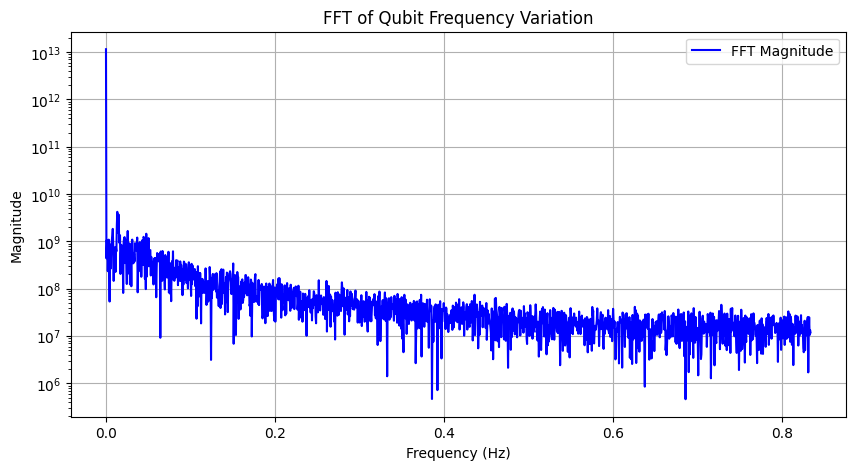

In [28]:
from scipy.fftpack import fft, fftfreq

# Define time array based on sweep_param and TQDM estimated time per iteration
time_array = sweep_param1D * time_per_iter_TQDM  # Convert sweep_param to time
# time_array = sweep_param1D * time_per_iter_VNA  # Convert sweep_param to time

# Perform FFT on the qubit frequency corresponding to minimal phase
N = len(time_array)  # Number of data points
T = time_per_iter_TQDM  # Sampling interval (seconds per iteration)
# T = time_per_iter_VNA  # Sampling interval (seconds per iteration)

freqs = fftfreq(N, T)  # Frequency components
fft_values = fft(qu_freq_min_phase)  # Compute the FFT

# Plot the FFT spectrum (magnitude)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N // 2], np.abs(fft_values[:N // 2]), label="FFT Magnitude", color="b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.yscale("log")
plt.title("FFT of Qubit Frequency Variation")
plt.legend()
plt.grid(True)
plt.show()
